In [2]:
#this is a collection of the different packages/extensions we are going to use in this exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pokemon 101
What can you do with a simple csv and a few lines of python?

In [3]:
# first we read in th file
df = pd.read_csv('https://raw.githubusercontent.com/DatasRev/source-files/master/csv/pokemon_start.csv')

In [4]:
# then we have a quick look at the first few rows
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0


In [4]:
#short primer about data types in pandas, here we investigate the type of the different variables we have
df.dtypes

Name           object
Type 1         object
Type 2         object
Total         float64
HP            float64
Attack        float64
Defense       float64
Sp. Atk       float64
Sp. Def       float64
Speed         float64
Generation    float64
Legendary     float64
dtype: object

In [5]:
#description of the variables
df.describe(include='all')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,801,801,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000


So it seems we have a duplicate from Bulbasaur here (we have 801 Names, but only 800 of them are unique), let's find and compare them!

In [6]:
df.loc[df.Name=='Bulbasaur']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
800,Bulbasaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


other methods to search for duplicates:  value count,specify index during read.csv-->how to find out which are duplicates; how to look for NaN values, drop them

? how would you do it, how would you drop it? what would you check to to see whether the data is good? most common issues? how to catch them?

Okay, so the firstseems to be the  more informative one, let's drop the other one based on the index!

In [7]:
df.drop([800])

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0
5,Charmeleon,Fire,NaN,405.0,58.0,64.0,58.0,80.0,65.0,80.0,1.0,0.0
6,Charizard,Fire,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0,1.0,0.0
7,CharizardMega Charizard X,Fire,Dragon,634.0,78.0,130.0,111.0,130.0,85.0,100.0,1.0,0.0
8,CharizardMega Charizard Y,Fire,Flying,634.0,78.0,104.0,78.0,159.0,115.0,100.0,1.0,0.0
9,Squirtle,Water,NaN,314.0,44.0,48.0,65.0,50.0,64.0,43.0,1.0,0.0


In [8]:
df.loc[df.Name=='Bulbasaur']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
800,Bulbasaur,Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Oh, no! Nothing happened, what did we miss? (inplace concept)

In [9]:
df.drop([800], inplace=True)

In [10]:
df.loc[df.Name=='Bulbasaur']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0


Let's add our own creature to the list!

In [11]:
df=df.append({'Name' : 'Kelpie' , 'Type 1' : 'Grass',  'Type 2' :'Fairy', 'Total': 330, 'HP':60, 'Attack':30, 'Defense':40,
       'Sp. Atk':65, 'Sp. Def':55, 'Speed':5, 'Generation':2, 'Legendary':0} , ignore_index=True)
#ignore_index in default is false, then the original index is kept, so you will end up with two 0s...

In [12]:
df.tail()
#this is the opposite of head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
796,DiancieMega Diancie,Rock,Fairy,700.0,50.0,160.0,110.0,160.0,110.0,110.0,6.0,1.0
797,HoopaHoopa Confined,Psychic,Ghost,600.0,80.0,110.0,60.0,150.0,130.0,70.0,6.0,1.0
798,HoopaHoopa Unbound,Psychic,Dark,680.0,80.0,160.0,60.0,170.0,130.0,80.0,6.0,1.0
799,Volcanion,Fire,Water,600.0,80.0,110.0,120.0,130.0,90.0,70.0,6.0,1.0
800,Kelpie,Grass,Fairy,330.0,60.0,30.0,40.0,65.0,55.0,5.0,2.0,0.0


What is the minimum total value in this dataset?

In [13]:
df['Total'].min()

180.0

And which creature has it?

In [14]:
df.loc[df.Total==180]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180.0,30.0,30.0,30.0,30.0,30.0,30.0,2.0,0.0


Of course there is also an easier way to do this, within a single step:

In [15]:
df.loc[df.Total==df['Total'].min()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180.0,30.0,30.0,30.0,30.0,30.0,30.0,2.0,0.0


In [16]:
#try it out for yourself with stg else
df.loc[df.Total==df['Attack'].max()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
322,Azurill,Normal,Fairy,190.0,50.0,20.0,40.0,20.0,40.0,20.0,3.0,0.0


In [18]:
df.groupby(['Generation']).mean()
#df.groupby['Generation'].agg('sum')

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1.0,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2.0,417.457944,71.102804,71.635514,73.074766,65.934579,73.728972,61.280374,0.046729
3.0,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
4.0,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
5.0,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909
6.0,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,0.097561


In [19]:
y=df.groupby(['Generation'])['Attack'].mean()

<BarContainer object of 6 artists>

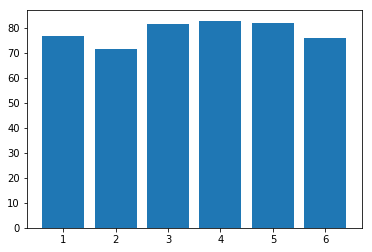

In [20]:
plt.bar([1,2,3,4,5,6], y, width=0.8, align='center')

In [21]:
df.groupby(['Type 2'])['Name'].count()

Type 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       24
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
Name: Name, dtype: int64

In [22]:
col_rename = {'HP':'Health point'}   # renaming with a dictionary
df = df.rename(columns=col_rename)
df.head()

,Name,Type 1,Type 2,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0
4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0


In [23]:
df.groupby(['Type 1']).mean()

,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [63]:
df.groupby(['Legendary']).mean()

,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Attack_Rank,Defense_Rank,AD_Rank
Legendary,,,,,,,,,,,
0.0,417.095109,67.172554,75.607337,71.516304,68.449728,68.873641,65.373641,3.282609,412.660326,407.084239,819.744565
1.0,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,144.692308,179.584615,324.276923


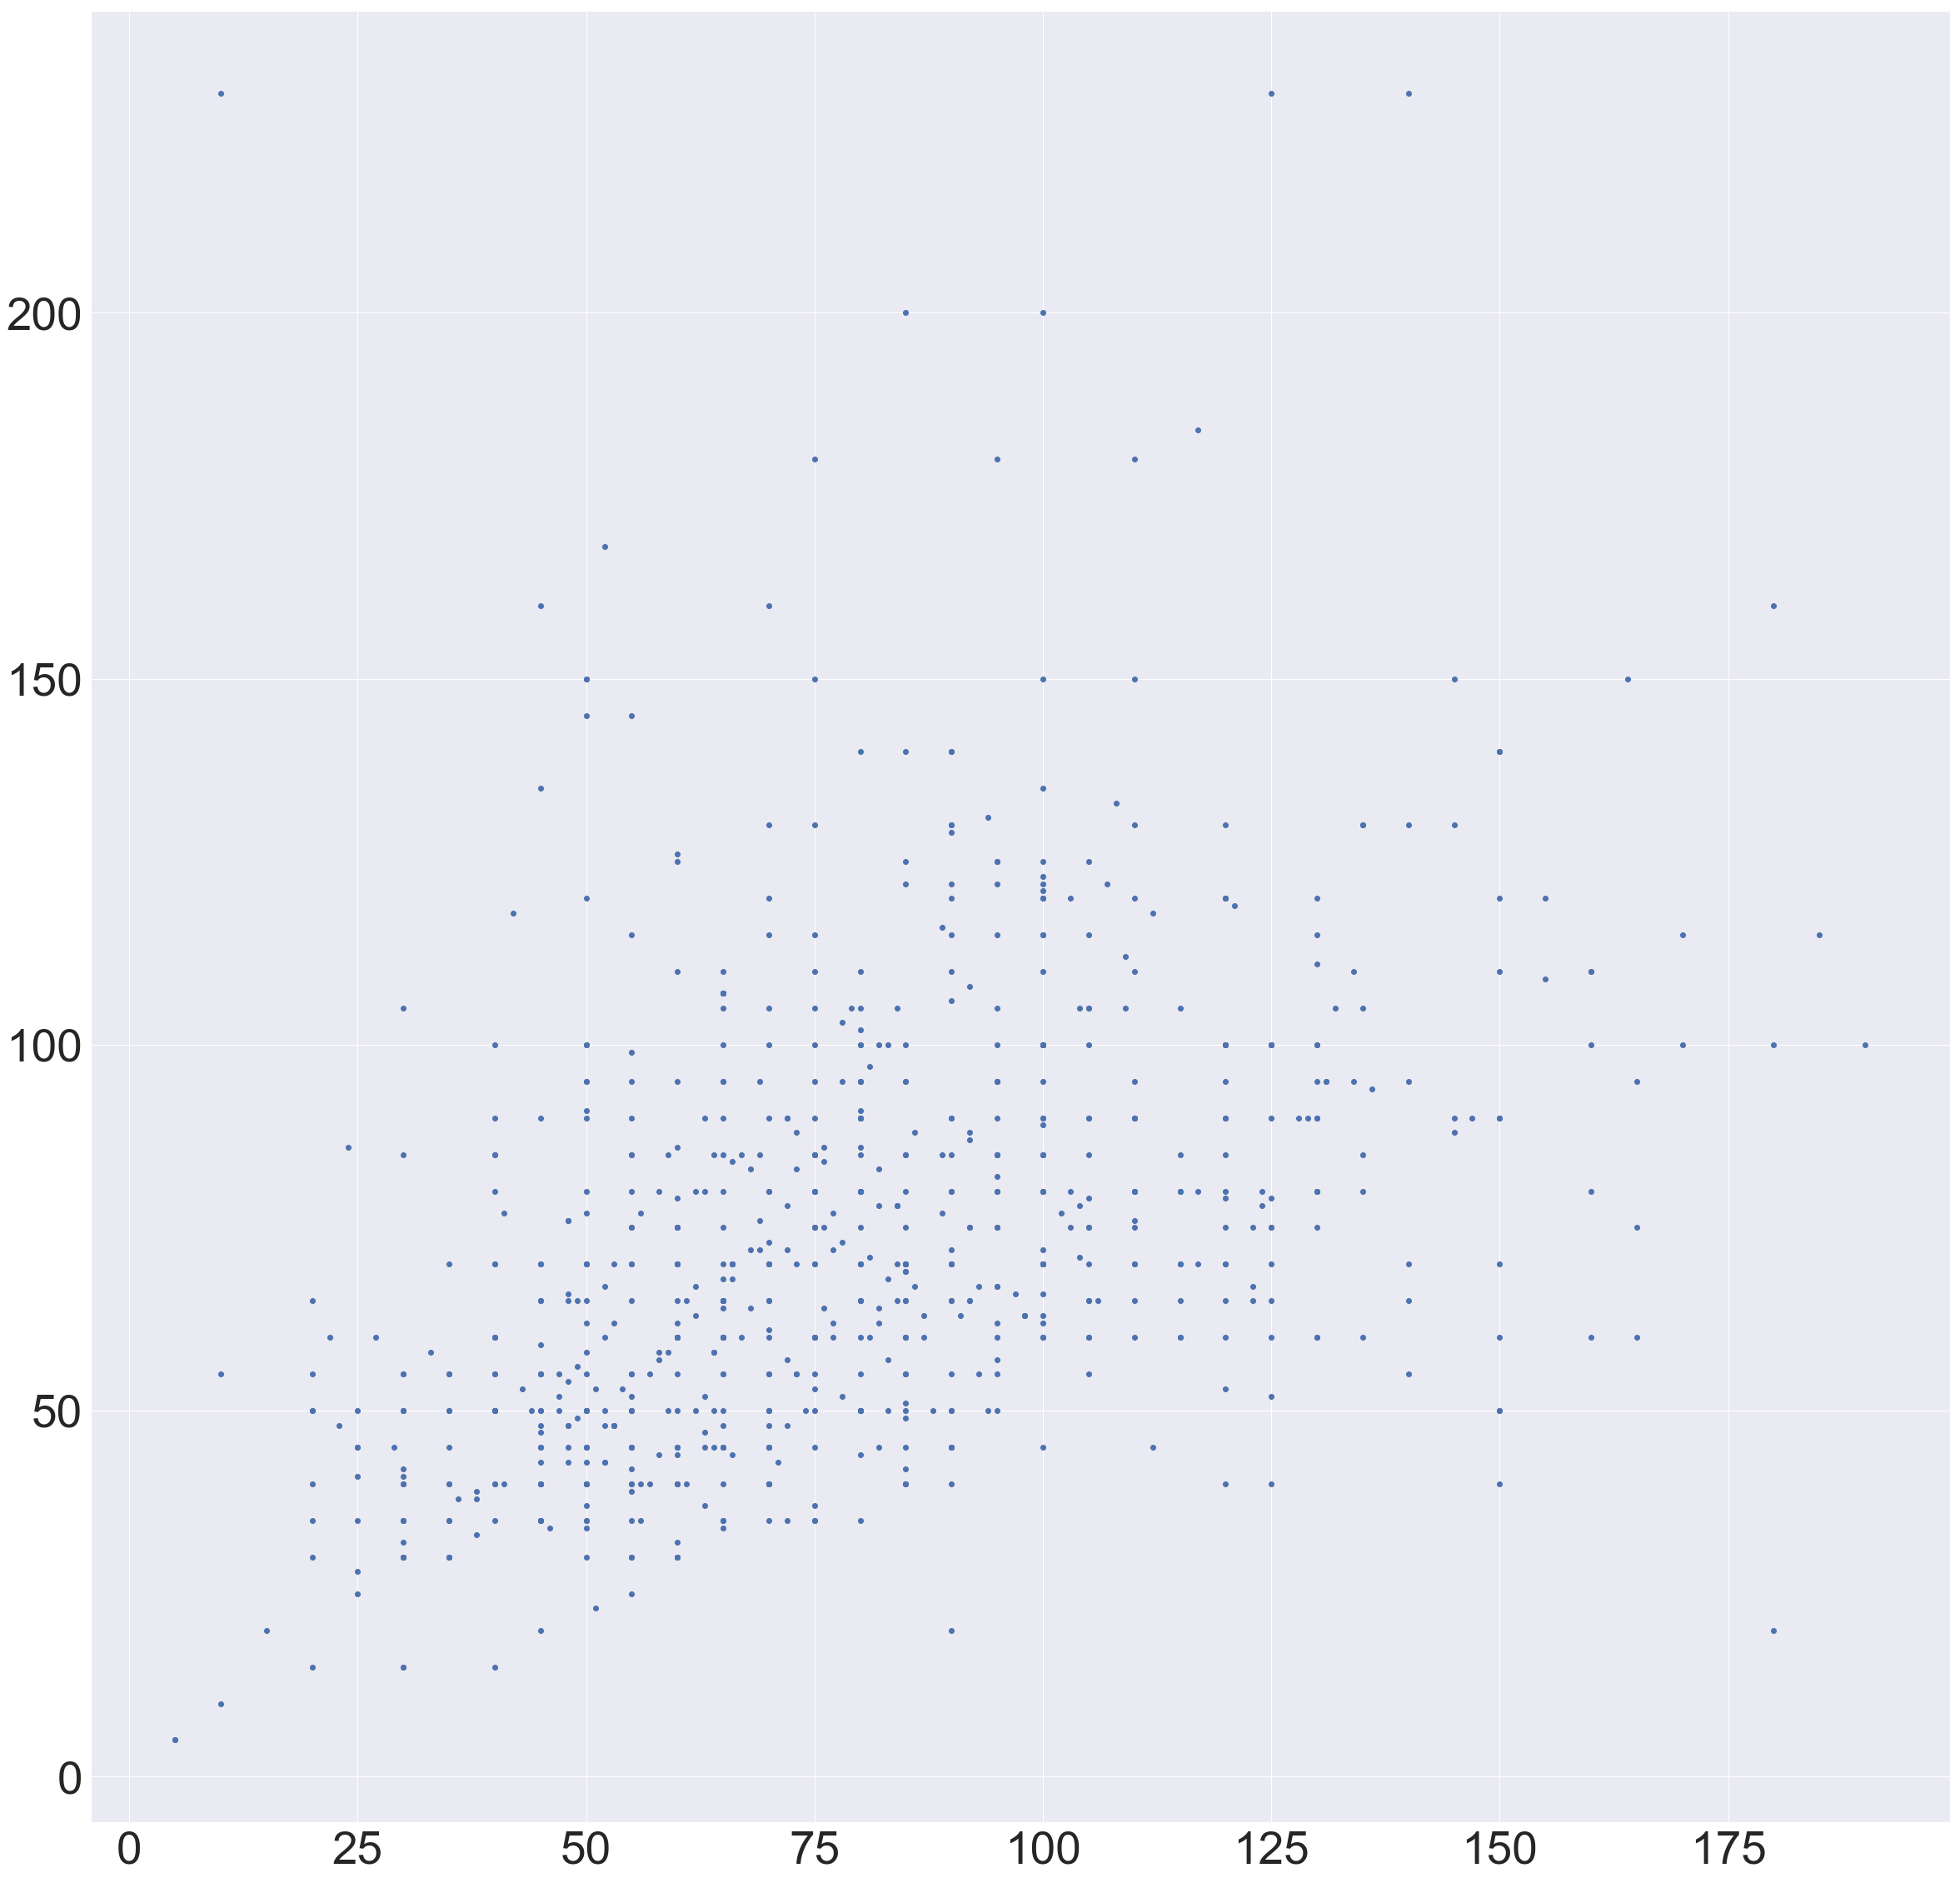

In [44]:
plt.scatter(df['Attack'], df['Defense'])


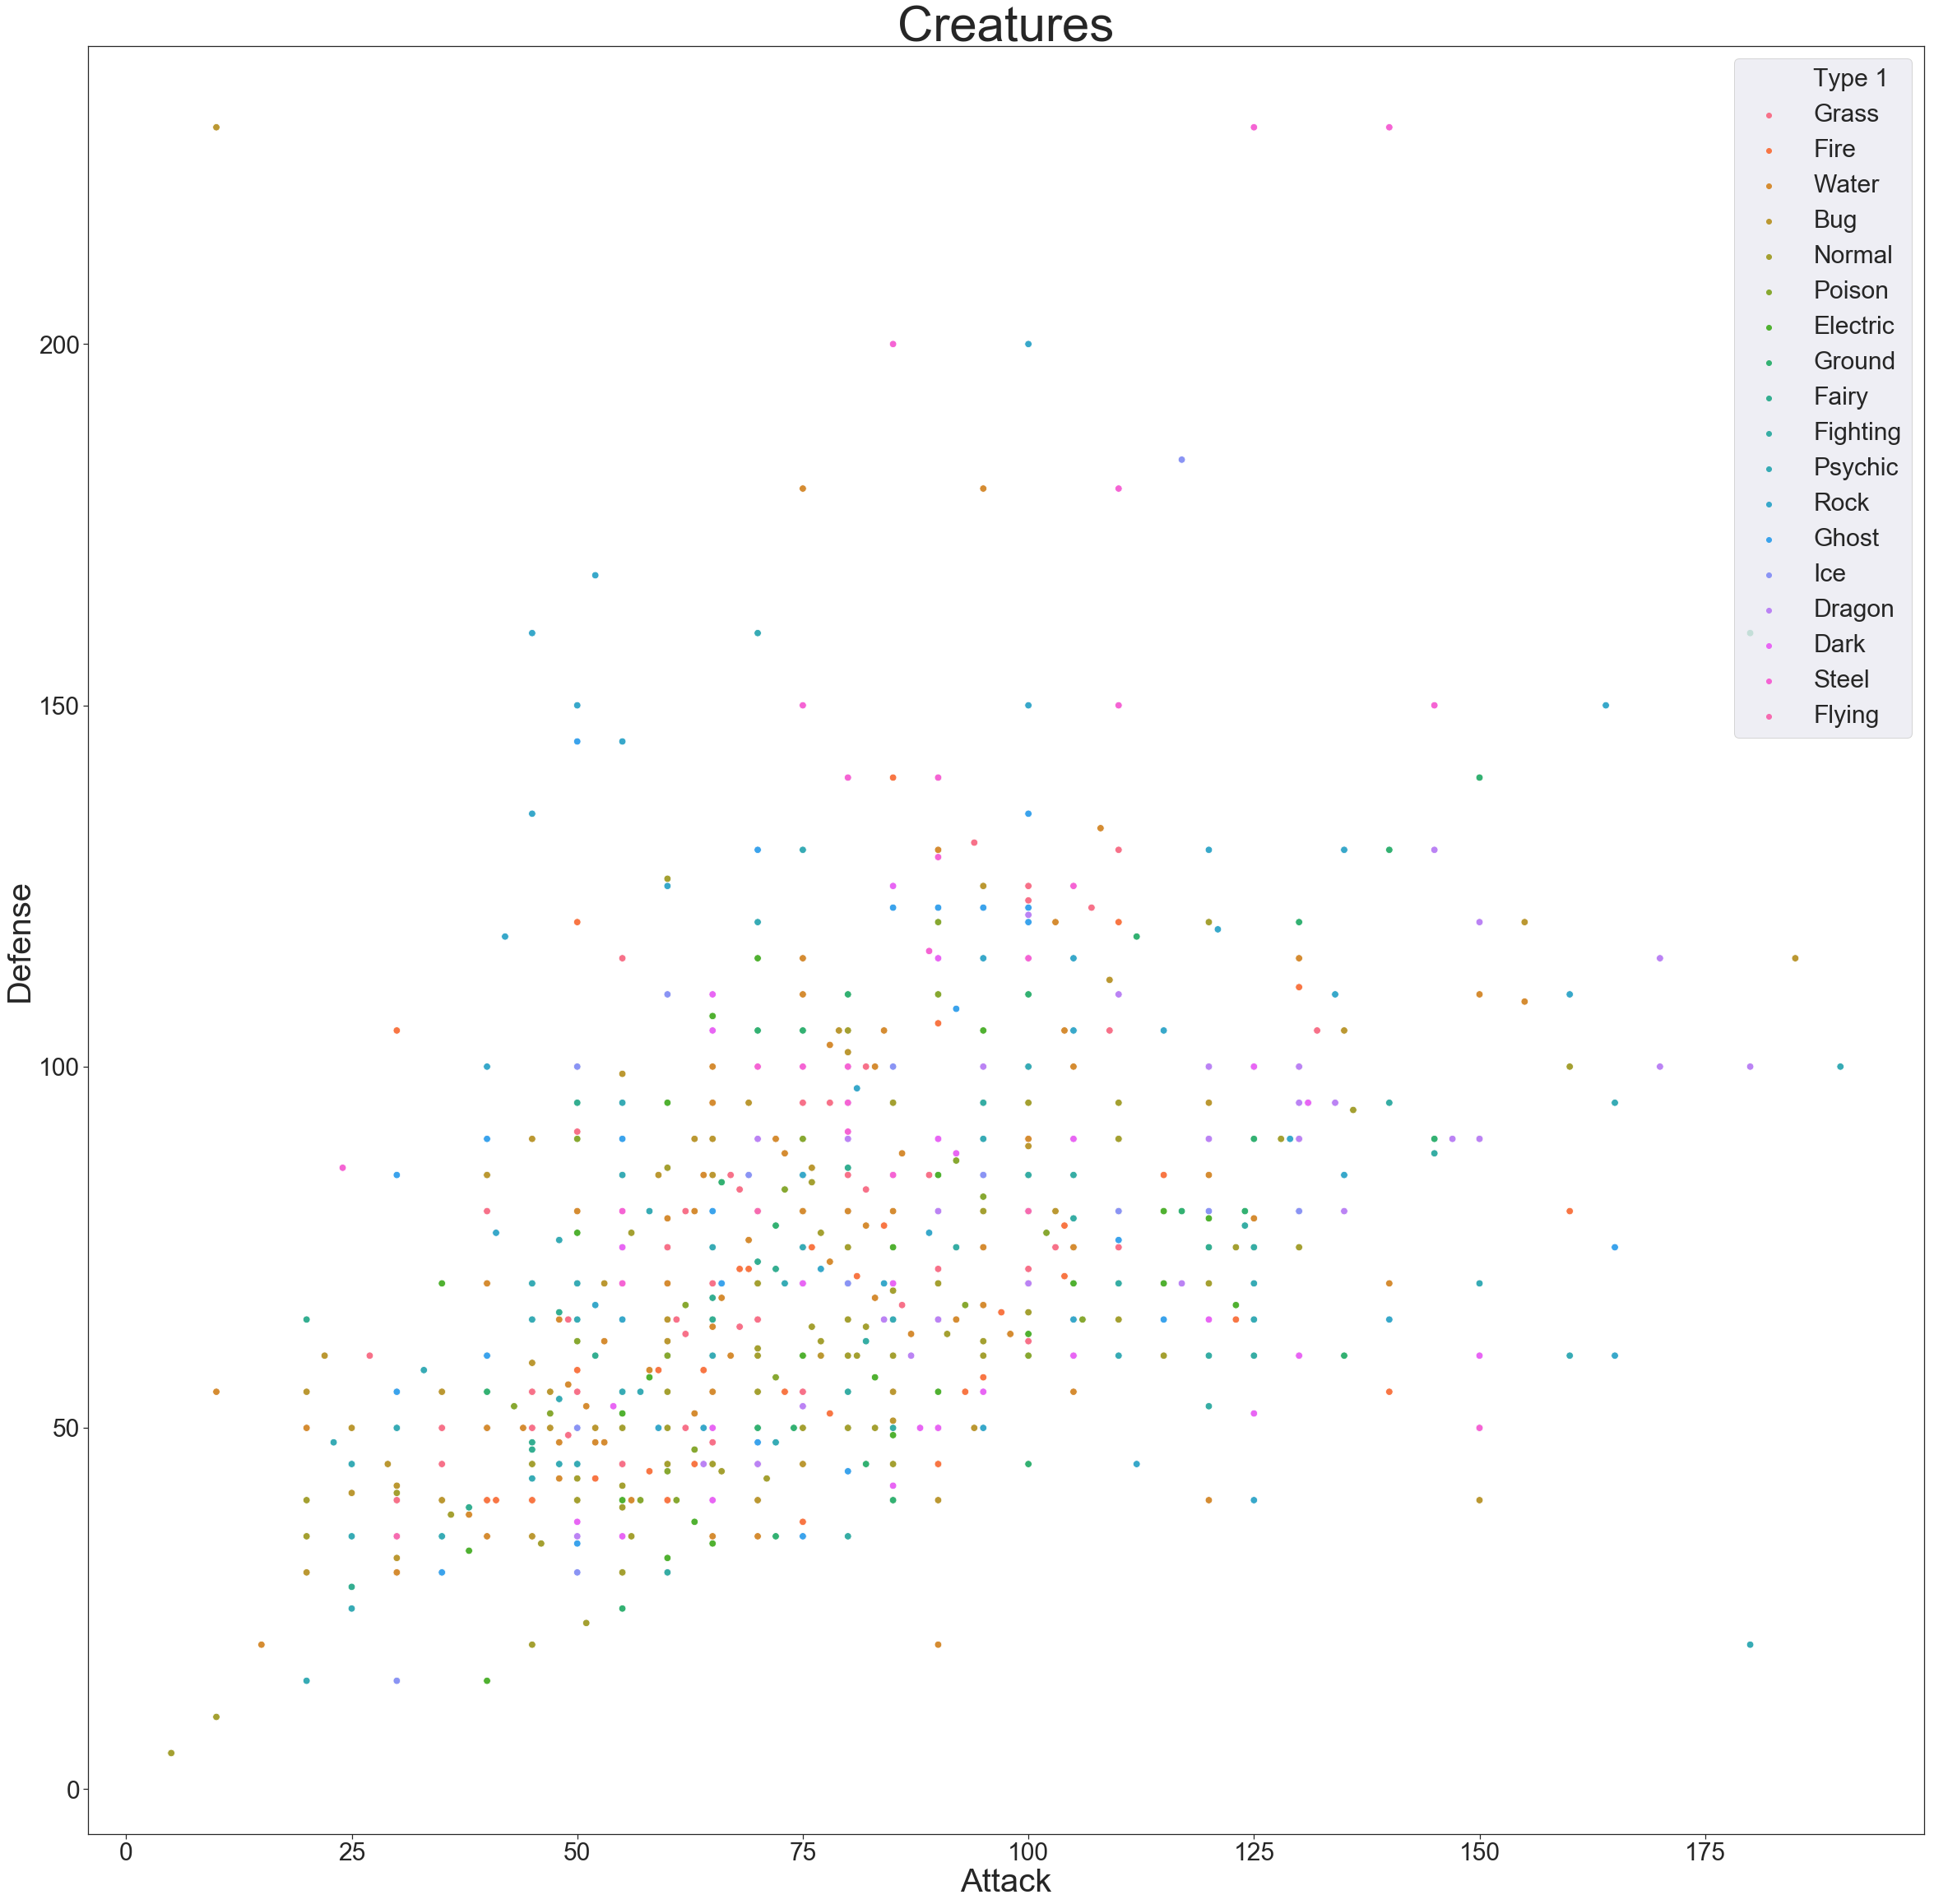

In [47]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
ax = sns.scatterplot(x="Attack", y="Defense", hue="Type 1", s=75, data=df)
sns.set(rc={'figure.figsize':(40,40)},font_scale=5)
plt.legend(loc='upper right',fontsize=30)

plt.title('Creatures')
# Set x-axis label
plt.xlabel('Attack',fontsize=40)
# Set y-axis label
plt.ylabel('Defense',fontsize=40)
# Set font size on the axes
plt.tick_params(labelsize=30)

Let's create a rank score based on the attack capabilities! (rank 1 corresponds to the the highest attack value )

In [51]:
df["Attack_Rank"] = df["Attack"].rank(method ='min', ascending=False) 
#method is about how to handle identical values, ascending is about whather highest or lowest value should become rank 1

In [52]:
df.sort_values("Attack_Rank", inplace = True)
df.head()

,Name,Type 1,Type 2,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_Rank
163,MewtwoMega Mewtwo X,Psychic,Fighting,780.0,106.0,190.0,100.0,154.0,100.0,130.0,1.0,1.0,1.0
232,HeracrossMega Heracross,Bug,Fighting,600.0,80.0,185.0,115.0,40.0,105.0,75.0,2.0,0.0,2.0
426,RayquazaMega Rayquaza,Dragon,Flying,780.0,105.0,180.0,100.0,180.0,100.0,115.0,3.0,1.0,3.0
424,GroudonPrimal Groudon,Ground,Fire,770.0,100.0,180.0,160.0,150.0,90.0,90.0,3.0,1.0,3.0
429,DeoxysAttack Forme,Psychic,NaN,600.0,50.0,180.0,20.0,180.0,20.0,150.0,3.0,1.0,3.0


Legendary creatures are legendary indeed, even on this leaderboard!

Let's rank them the same way based on defense, too!

In [53]:
df["Defense_Rank"] = df["Defense"].rank(method ='min', ascending=False) 
df.sort_values("Defense_Rank", inplace = True)
df.head()

,Name,Type 1,Type 2,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_Rank,Defense_Rank
230,Shuckle,Bug,Rock,505.0,20.0,10.0,230.0,10.0,230.0,5.0,2.0,0.0,797.0,1.0
333,AggronMega Aggron,Steel,NaN,630.0,70.0,140.0,230.0,60.0,80.0,50.0,3.0,0.0,35.0,1.0
224,SteelixMega Steelix,Steel,Ground,610.0,75.0,125.0,230.0,55.0,95.0,30.0,2.0,0.0,69.0,1.0
223,Steelix,Steel,Ground,510.0,75.0,85.0,200.0,55.0,65.0,30.0,2.0,0.0,291.0,4.0
414,Regirock,Rock,NaN,580.0,80.0,100.0,200.0,50.0,100.0,50.0,3.0,1.0,171.0,4.0


In [55]:
df["AD_Rank"] =df["Defense_Rank"]+df["Attack_Rank"]

## AAAAND the creature with the lowest combined attack-defense rank is....

In [60]:
df.loc[df["AD_Rank"] == df["AD_Rank"].min()]


,Name,Type 1,Type 2,Total,Health point,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_Rank,Defense_Rank,AD_Rank
424,GroudonPrimal Groudon,Ground,Fire,770.0,100.0,180.0,160.0,150.0,90.0,90.0,3.0,1.0,3.0,11.0,14.0


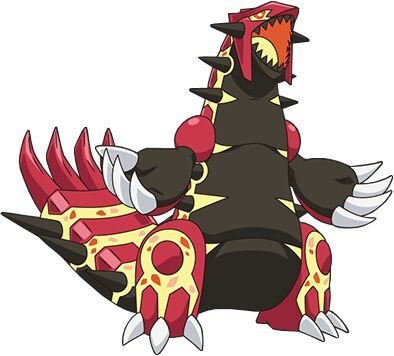